In [37]:
import numpy as np
from matplotlib import pyplot as plt
from utilitiesDOS import read_dump, calculate_fft, calculate_autocorr

In [39]:
import os, sys, git
sys.path.append('pyplot-perso/')
from functions import complete_panel, save_figure, set_boundaries, \
    add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = "/figures/"

In [40]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path)

### Import LAMMPS velocities

In [2]:
path_to_file = "LAMMPS-input/dump.lammpsvel"
velocities, n_atoms, n_frames, n_columns, printing_period = read_dump(path_to_file)
print("Shape of the velocities array =", np.shape(velocities))
print("Number of frames =", n_frames)
print("Number of particles =", n_atoms)

Shape of the velocities array = (850, 3, 2001)
Number of frames = 2001
Number of particles = 850


### Choose correlation length

In [4]:
correlation_len = n_frames // 4
print("Correlation length =", correlation_len)

Correlation length = 500


### Set timestep

In [8]:
dt = 2.32 # fs
min_dt = dt * printing_period # duration between two printed velocity
print("The velocities was printed every", min_dt, "fs")

The velocities was printed every 11.6 fs


### Calculate VACF

In [38]:
vacf_xyz = np.zeros((3, correlation_len), dtype=float)
vacf = np.zeros((correlation_len), dtype=float)  
for i_time in range(correlation_len, n_frames, correlation_len):
    for i_atom in range(n_atoms):
        for i_dim in range(3):
            vacf_xyz[i_dim] += calculate_autocorr(velocities[i_atom,
                                                             i_dim,i_time-correlation_len:i_time],
                                                   correlation_len)
for vxyz in vacf_xyz: # Average all 3 direction
    vacf += vxyz
vacf /= vacf[0] # Normalize the velocity correlation

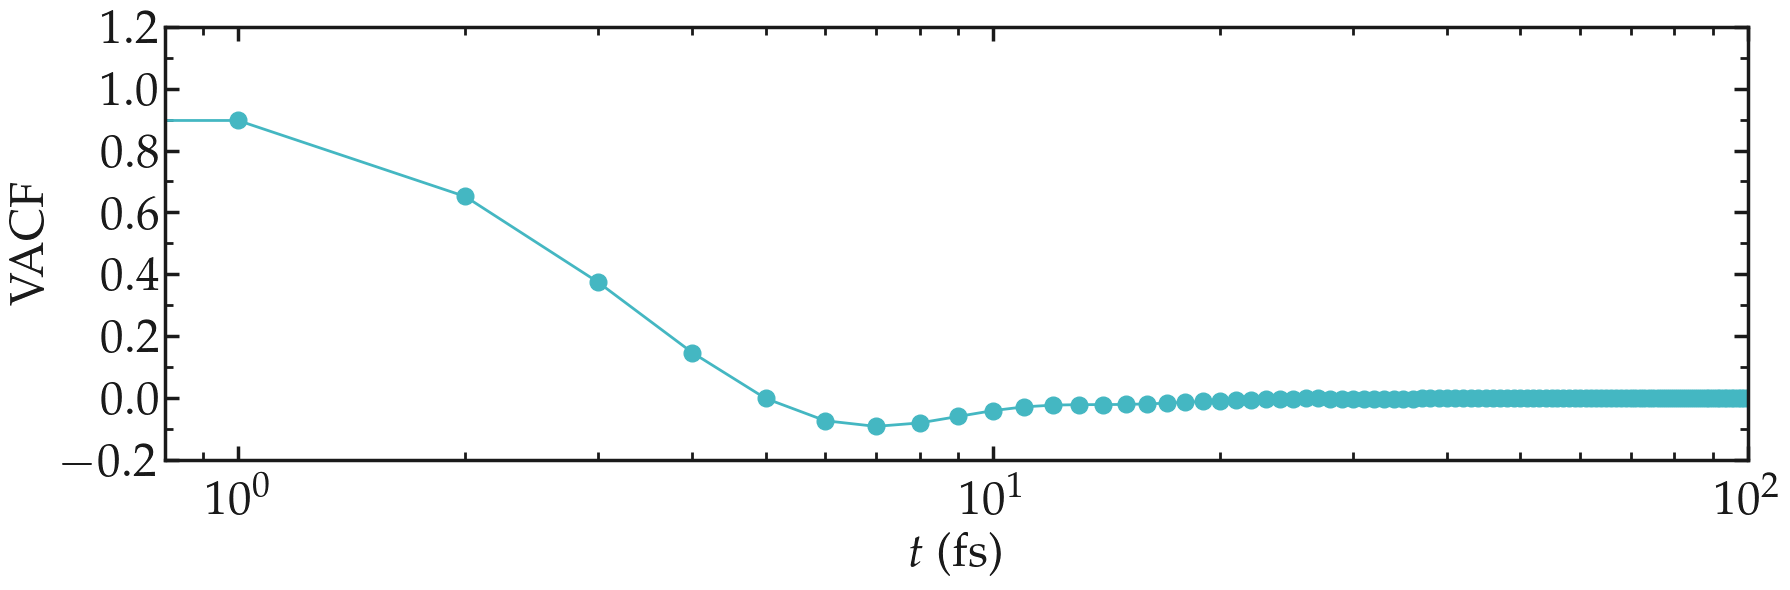

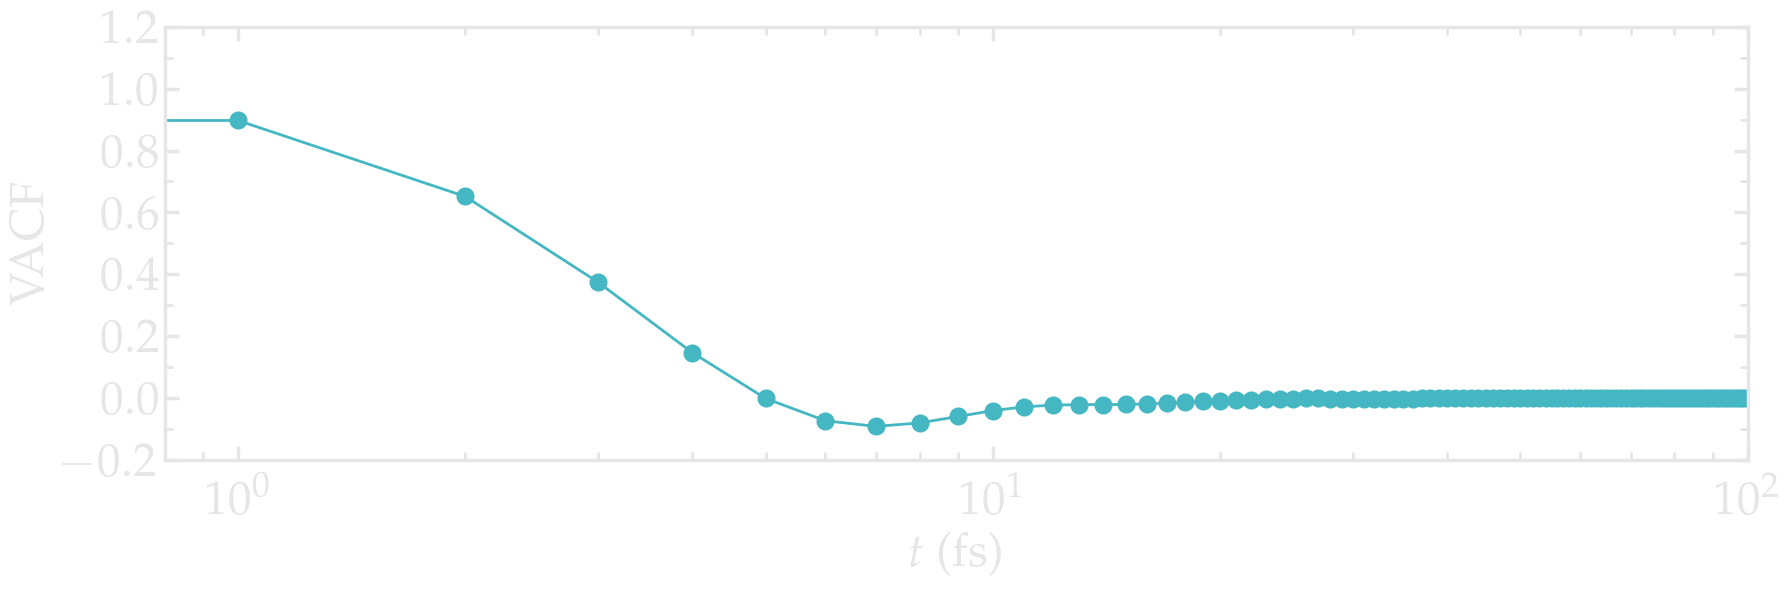

In [50]:
filename = "vacf"
desired_transparency = True
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency=desired_transparency, desired_figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].semilogx(vacf, 'o-', color=colors["mycyan"],
                markersize = 12, linewidth=2)
    complete_panel(ax[-1], r'$t$ (fs)', r'$\textrm{VACF}$',
                   legend=False, axis_color=mygray, xpad=15, locator_x=None)
    set_boundaries(plt, x_boundaries=(0.8, 100), y_boundaries=(-0.2, 1.2)) 
    save_figure(plt, fig, mode, git_path, path_figures, filename, transparency = desired_transparency)

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from utilitiesDOS import read_dump, calculate_fft, calculate_autocorr

In [9]:

#Ensemble average of correlation
blocks = range(corlen,total,corlen)
for t in blocks:
    for i in range(num_atoms):
        VACF_vx += autocorr(data[i,0,t-corlen:t], len(VACF_vx))
        VACF_vy += autocorr(data[i,1,t-corlen:t], len(VACF_vy))
        VACF_vz += autocorr(data[i,2,t-corlen:t], len(VACF_vz))
#Average of Vx,Vy,Vz and blocks 
TVACF_v += ((VACF_vx + VACF_vy + VACF_vz) / 3.00)
TVACF_norm = TVACF_v / TVACF_v[0]

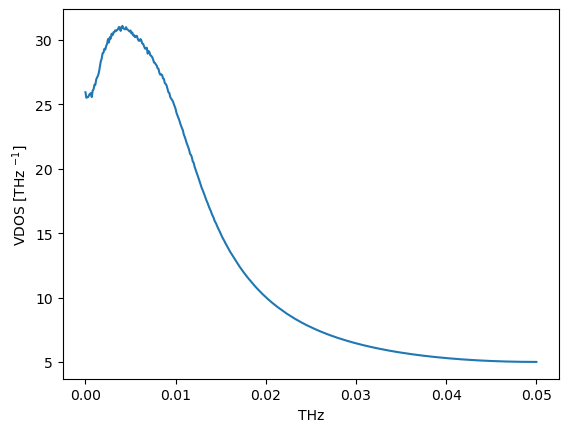

In [11]:
# plt.semilogx(TVACF_norm, '.')
dt = 10 # fs
# x = np.arange(corlen)*dt
#Write VACF to file
# f = open('VACF.dat','w')
# f.write('#Time(ps) Norm. I. (No Units) \n')
# for i in range(x.size):
#     f.write('%f %f \n' %(x[i],TVACF_norm[i]))
# f.close()

std = corlen/15.5
vsize = TVACF_v.size  
# np.lib.pad(TVACF_v,(0,vsize*15),'constant',constant_values=(0))
TVACF_v *= signal.get_window(('gaussian',std),vsize) 
fft_v = fft_autocorr(TVACF_norm,dt) # * 1.0E12 #THz^-1     
freq = np.fft.rfftfreq(vsize, d=dt) # / 1.0E12 #THz

plt.plot(freq,np.abs(fft_v))
plt.xlabel('THz')
plt.ylabel(r'VDOS [THz $^{-1}$]')
plt.show()


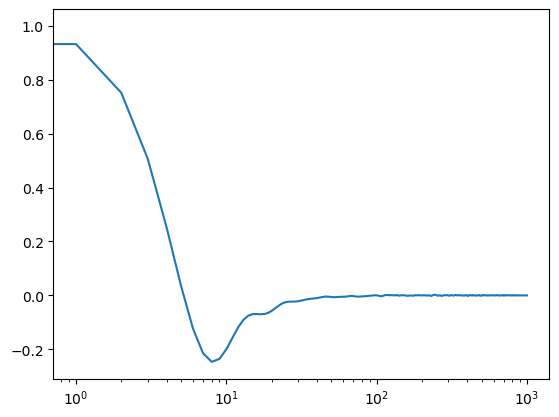

In [51]:
plt.semilogx(TVACF_norm)